# 비지도 학습과 데이터 전처리
비지도 학습은 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝을 가리킨다. 비지도 학습에서 학습 알고리즘은 입력 데이터만으로 데이터에서 데이터에서 지식을 추출할 수 있어야 한다.

# 비지도 학습의 종류
여기서 살펴볼 두 가지다.
- 데이터의 비지도 변환
    - unsupervised transformation
- 군집
    - clustering
    
비지도 변환 unsupervised transformation 은 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘이다. 널리 사용되는 분야는 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소dimensionality reduction이다. 차원 축소의 대표적 예는 시각화를 위해 데이터셋을 2차원으로 변경하는 경우다.

비지도 변환으로 데이터를 구성하는 단위나 성분을 찾기도 한다. 많은 텍스트 문서에서 주제를 추출하는 것이 이런 예다. 이때 처리할 작업은 문서에서 이야기하는 주제들이 무엇인지 찾고 학습하는 것이다. 

군집clustering 알고리즘은 데이터를 비슷한 것끼리 그룹으로 묶는 것이다. 만약 사진을 업로드한다고 하자. 업로드한 사진을 분류하려면 같은 사람이 찍힌 사진을 같은 그룹으로 묶을 수 있다. 하지만 사이트는 찍힌 사람이 누군지, 사진 앨범에 얼마나 많은 사람이 있는지 모른다. 가능한 방법은 사진에 나타난 모든 얼굴을 추출해서 비슷한 얼굴로 그룹 짓는 것이다. 그룹 지은 얼굴이 같은 사람이면 이미지들을 그룹으로 잘 묶은 것이다.

# 비지도 학습의 도전 과제
비지도 학습에서 가장 어려운 것은 제대로 학습했는지 평가하는 것이다. 보통 레이블이 없는 데이터에 적용하기 때문에 올바른 출력인지 모른다. 만약 얼굴분류 알고리즘이 옆모습과 앞모습 사진으로 분류할 수도 있다. 이것도 틀린 것은 아니지만 우리가 원하는 방향은 아니다. 하지만 알고리즘에게 우리가 원하는 것을 알려줄 수 없다. 비지도 학습의 결과를 평가하기 위해서는 직접 확인하는 것이 유일한 방법일 때가 많다.

그래서 비지도 학습은 데이터 과학자가 데이터를 더 잘 이해하고 싶을 때 탐색적 분석 단계에서 많이 사용한다. 비지도 학습은 지도 학습의 전처리 단계에서도 사용한다. 비지도 학습의 결과로 새롭게 표현된 데이터를 사용해 학습하면 지도 학습의 정확도가 좋아지기도 하며 메모리와 시간을 절약할 수 있다.

다음은 진짜 비지도 학습 알고리즘을 배우기 전 몇 가지 간단한 전처리 메소드를 기술한다. 지도 학습 알고리즘에서 전처리와 스케일 조정을 자주 사용하지만, 스케일 조정 메소드는 지도 정보supervised information 를 사용하지 않으므로 비지도 방식이다.

In [127]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib notebook
%matplotlib inline

# 데이터 전처리와 스케일 조정
신경망과 SVM 같은 알고리즘은 데이터의 스케일에 매우 민감하다. 그래서 보통 이런 알고리즘들에 맞게 데이터 특성 값을 조정한다. 보통 특성마다 스케일을 조정해서 데이터를 변경한다.

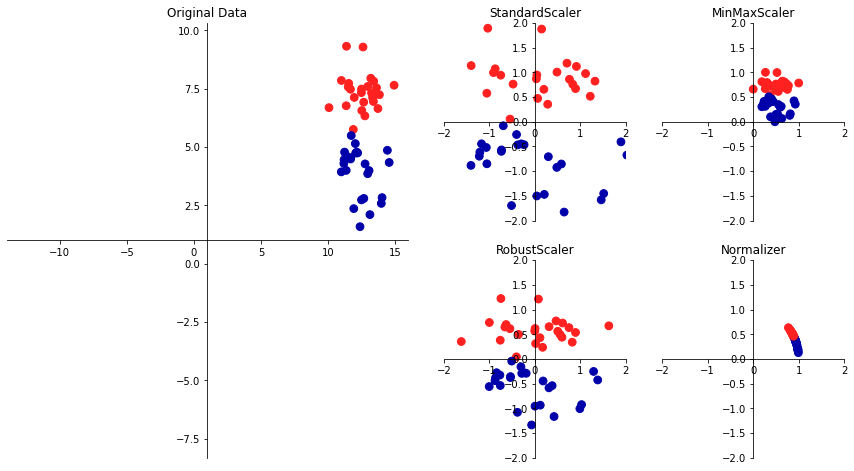

In [128]:
mglearn.plots.plot_scaling()

## 여러 가지 전처리 방법
위 그림의 첫 번째 그래프는 두 개의 특성을 인위적으로 만든 이진 분류 데이터셋이다. 첫번째 특성(x axis value)은 10-15 사이에 있다. 두 번째 특성(y axis value) 은 1-9 사이에 있다.

오른쪽의 네 그래프는 데이터를 기준이 되는 범위로 변환하는 네 가지 방법을 보여준다. 

sklearn 의 StandardScaler는 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다. 그러나 이 방법은 특성의 최솟값과 최댓값 크기를 제한하지 않는다.

RobustScaler는 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 StandardScaler와 비슷하다. 하지만 평균과 분산 대신 중간 값median과 사분위 값quartile을 사용한다. 이런 방식 때문에 RobustScaler는 전체 데이터와 아주 동떨어진 데이터 포인트(e.g.측정 에러)에 영향을 받지 않는다. 이런 데이터를 이상치outlier라 하며 다른 스케일 조정 기법에서는 문제가 될 수 있다.

MinMaxScaler는 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경한다. 2차원 데이터셋일 경우에는 모든 데이터가 x축의 0과 1, y축의 0과 1 사이의 사각 영역에 담기게 된다.

Normalizer는 매우 다른 스케일 조정 기법이다. 이 방식은 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다. 다른 말로, 지름이 1인 원(3차원일 땐 구)에 데이터 포인트를 투영한다. 이 말은 각 데이터 포인트가 다른 비율로(길이에 반비례하여) 스케일이 조정된다는 뜻이다. 이런 정규화normalization는 특성 벡터의 길이는 상관 없고 데이터의 방향(또는 각도)만이 중요할 때 많이 사용한다.

## 데이터 변환 적용하기
스케일을 조정하는 전처리 메소드들은 보통 지도학습 알고리즘 적용 전에 적용한다. 여기선 cancer 데이터셋에 커널 SVM(SVC) 을 적용하고 데이터 전처리에는 MinMaxScaler를 사용한다. 

In [129]:
from sklearn.datasets import load_breast_cancer

In [130]:
cancer = load_breast_cancer()

In [131]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [132]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


dataset 에는 569개의 데이터 포인트가 있고 각 데이터 포인트는 30개의 측정값으로 이뤄져 있다. 

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

스케일러에 있는 fit 메소드를 사용한다. fit 메소드는 훈련 셋에 있는 특성마다 최솟값과 최댓값을 계산한다. X_train 만 넘겨주면 되고 y_train은 넘겨줄 필요가 없다.

In [134]:
scaler.fit(X_train)

MinMaxScaler()

fit 메소드를 학습한 변환을 적용하려면, 즉 실제로 훈련 데이터의 스케일을 조정하려면 스케일 객체의 tranform 메소드를 사용한다. sklearn의 transform은 새로운 데이터 표현representation을 만들 때 쓰는 메소드다.

In [135]:
X_train_scaled = scaler.transform(X_train)

In [136]:
print(X_train_scaled.shape)

(426, 30)


In [137]:
print(X_train.min(axis=0))
print(X_train_scaled.min(axis=0))

[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [138]:
print(X_train.max(axis=0))
print(X_train_scaled.max(axis=0))

[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


변환된 데이터의 배열 크기는 원래 데이터와 동일하다. 즉 특성 값이 이동되거나 크기가 조정되었을 뿐이다. 예상대로 모든 특성의 값은 0과 1사이가 됐다. 

이 데이터에 SVM을 적용하려면 테스트 셋도 변환해야 한다. 이땐 X_test를 넣어 transform 메소드를 호출하면 된다.

In [139]:
X_test_scaled = scaler.transform(X_test)

In [140]:
print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


스케일을 조정했으나 조정한 테스트 셋의 최솟값과 최댓값이 0과 1이 아니다. 일부 특성은 0-1 범위를 벗어났다. 

모든 스케일 모델은 항상 트레인 셋과 테스트 셋에 같은 변환을 적용해야 한다. transform 메소드는 테스트 셋의 최솟값과 범위를 사용하지 않고, 항상 훈련 셋의 최솟값을 빼고 훈련 셋의 범위로 나눈다.

## QuantileTransformer와 PowerTransformer
sklearn 에 QuantileTransformer는 기본적으로 1,000개의 분위quantile를 사용하여 데이터를 균등하게 분포시킨다. RobustScaler와 비슷하게 이상치에 민감하지 않고 전체 데이터를 0과 1사이로 압축한다.

In [141]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

(0.0, 16.0)

Text(0.5, 0, 'x0')

(0.0, 10.0)

Text(0, 0.5, 'x1')

Text(0.5, 1.0, 'Original Data')

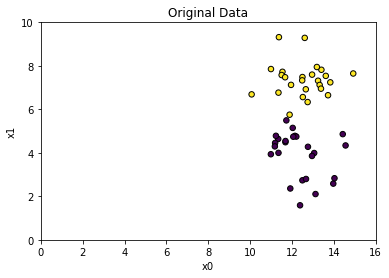

In [142]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3


plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

In [143]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

(0.0, 5.0)

Text(0.5, 0, 'x0')

(0.0, 5.0)

Text(0, 0.5, 'x1')

Text(0.5, 1.0, 'QuantileTransformer')

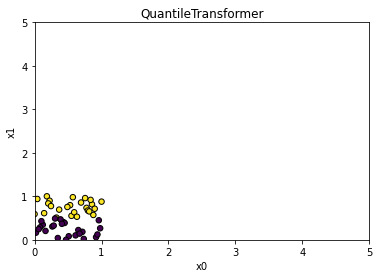

In [144]:
plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

랜덤하게 흩어져 있던 데이터 포인트들이 두 특성의 0과 1사이에 고르게 분포되어 있다. 변환된 데이터의 히스토그램을 그려보면 균등 분포를 쉽게 확인할 수 있다.

(array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

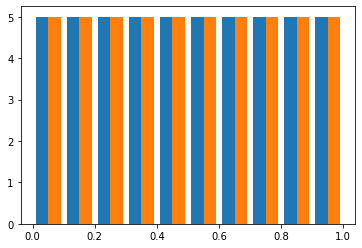

In [145]:
plt.hist(X_trans)

QuantileTransformer의 분위 수는 n_quantiles 매개변수에서 설정할 수 있고 기본값은 1,000 이다. scaler 객체의 quantiles_ 속성에는 특성별로 계산된 분위 값이 들어있어서 크기는 (n_quantiles, n_features)이다.

In [146]:
print(scaler.quantiles_.shape)

(50, 2)


아래는 하나의 특성과 다섯 개 샘플로 이루어진 간단한 데이터셋이다. 

np.precentile() 함수는 두 번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환한다. 여기에서는 첫 번째, 1사분위, 중간값, 3사분위, 마지막 값을 지정했다. 훈련 샘플이 5개 이므로 지정한 분위가 훈련 샘플과 정확히 일치한다.

In [147]:
x = np.array([[0], [5],[ 8], [9], [10]])

In [148]:
print(np.percentile(x[:,0], [0,25,50,75,100]))

[ 0.  5.  8.  9. 10.]


QuantileTransformer 로 변환한 후에 확인해보자. 

다음 결과를 보면 예제 데이터가 분위와 동일한 값으로 변환된 것을 알 수 있다.

In [149]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(x_trans[:,0],[0,25,50,75,100]))

[0.   0.25 0.5  0.75 1.  ]


QuantileTransformer는 output_distribution 매개변수를 normal 로 지정해 균등 분포가 아니라 정규분포로 출력을 바꿀 수 있다.

In [150]:
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

(-5.0, 5.0)

Text(0.5, 0, 'x0')

(-5.0, 5.0)

Text(0, 0.5, 'x1')

Text(0.5, 1.0, 'QuantileTransformer')

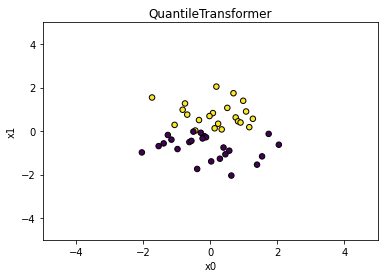

In [152]:
plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

sklearn의 PowerTransformer는 method 매개변수에 yeo-johnson 과 box-cox 알고리즘을 지정할 수 있다. 기본값은 yeo-johnson이다.

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1., 22., 19.,  8.],
        [ 7.,  4., 14.,  7., 16.,  2.,  0.,  0.,  0.,  0.]]),
 array([ 1.58657135,  2.92094135,  4.25531135,  5.58968135,  6.92405135,
         8.25842136,  9.59279136, 10.92716136, 12.26153136, 13.59590136,
        14.93027136]),
 <a list of 2 BarContainer objects>)

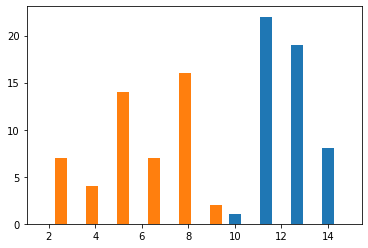

In [155]:
plt.hist(X)

(array([[ 1.,  0.,  0.,  7., 17., 17.,  7.,  0.,  0.,  1.],
        [ 1.,  0.,  0.,  7., 17., 17.,  7.,  0.,  0.,  1.]]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 2 BarContainer objects>)

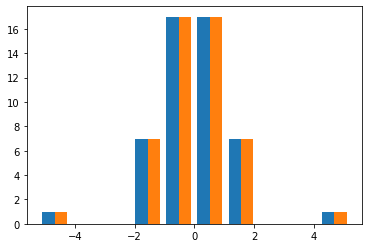

In [157]:
X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)

(array([[ 1.,  2.,  8.,  8.,  7.,  9.,  7.,  3.,  3.,  2.],
        [ 2.,  5.,  1., 14.,  3.,  3., 13.,  7.,  2.,  0.]]),
 array([-2.2873965 , -1.82123954, -1.35508259, -0.88892564, -0.42276869,
         0.04338826,  0.50954522,  0.97570217,  1.44185912,  1.90801607,
         2.37417302]),
 <a list of 2 BarContainer objects>)

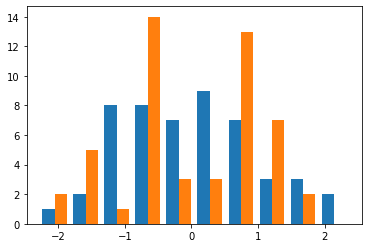

In [158]:
X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)

(array([[ 1.,  0.,  5.,  9.,  7.,  9.,  7.,  6.,  3.,  3.],
        [ 0.,  3.,  4.,  7., 10.,  2.,  7., 15.,  0.,  2.]]),
 array([-2.58264798, -2.10797071, -1.63329344, -1.15861617, -0.6839389 ,
        -0.20926163,  0.26541564,  0.74009291,  1.21477018,  1.68944745,
         2.16412472]),
 <a list of 2 BarContainer objects>)

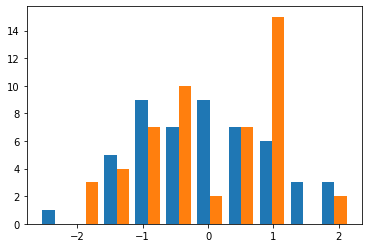

In [159]:
X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)

(array([[ 1.,  0.,  5.,  9.,  7.,  9.,  7.,  6.,  3.,  3.],
        [ 0.,  3.,  4.,  7., 10.,  2.,  7., 15.,  0.,  2.]]),
 array([-2.58077729, -2.10629309, -1.63180889, -1.15732469, -0.68284049,
        -0.20835628,  0.26612792,  0.74061212,  1.21509632,  1.68958052,
         2.16406472]),
 <a list of 2 BarContainer objects>)

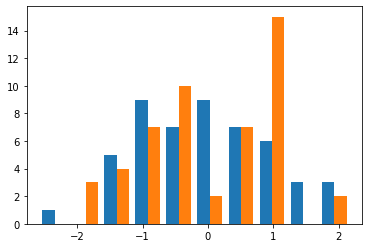

In [160]:
X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)

실전에서도 각 변환기의 결과를 히스토그램으로 확인해보는 것이 좋다.

## 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기